In [1]:
import pandas as pd 
data= pd.read_excel(r'D:\software\WeChat\chatHistory\WeChat Files\wxid_c7nv5q2umo0q21\FileStorage\File\2021-06\TEST(1).xlsx')

In [19]:
next(data.iterrows())

(0,
 日期    2021-03-01 00:00:00
 用户                      A
 语文                    NaN
 数学                   89.0
 英语                    NaN
 Name: 0, dtype: object)

In [20]:
del data

In [37]:
data.fillna(method='ffill')

,日期,用户,语文,数学,英语
0,2021-03-01,A,NaN,89.0,NaN
1,2021-02-01,A,NaN,92.0,76.0
2,2021-01-01,A,98.0,92.0,76.0
3,2021-03-01,B,99.0,92.0,76.0
4,2021-02-01,B,100.0,70.0,50.0
5,2021-01-01,B,100.0,70.0,60.0


In [33]:
data.fillna(method='bfill').groupby('用户')[['语文','数学','英语']].nth(0)

,语文,数学,英语
用户,,,
A,98.0,89.0,76.0
B,99.0,70.0,50.0


In [39]:
import numpy as np
df = pd.DataFrame({'A': [1, 1, 2, 1, 2],
                   'B': [np.nan, 2, 3, 4, 5]}, columns=['A', 'B'])
df

,A,B
0,1,NaN
1,1,2.0
2,2,3.0
3,1,4.0
4,2,5.0


In [46]:
df.groupby('A').indices

{1: array([0, 1, 3], dtype=int64), 2: array([2, 4], dtype=int64)}

In [44]:
next(dfiter)

(2,
    A    B
 2  2  3.0
 4  2  5.0)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv(r'D:\codeBase\googleplaystore.csv')

In [8]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
#处理空值

data.dropna(inplace=True)

In [12]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [20]:
categoryVal  = data['Category'].unique()
categoryValCount = len(categoryVal)
category_dict =  {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
data["Category_c"] = data["Category"].map(category_dict).astype(int)

In [26]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

data["Size"] = data["Size"].map(change_size)
data.Size.fillna(method = 'ffill', inplace = True)

In [43]:
# data['Installs'] = [int(i[:-1].replace(',','')) for i in data['Installs']]
data['Installs'] = data['Installs'].map(lambda x : int(x[:-1].replace(',','')))

In [45]:
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

data['Type'] = data['Type'].map(type_cat)

In [48]:
RatingL = data['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
data['Content Rating'] = data['Content Rating'].map(RatingDict).astype(int)

In [52]:
data.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [54]:
GenresL = data.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
data['Genres_c'] = data['Genres'].map(GenresDict).astype(int)

In [60]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

data['Price'] = data['Price'].map(price_clean).astype(float)

In [62]:
data['Reviews'] = data['Reviews'].astype(int)

In [63]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [65]:
data2 = pd.get_dummies(data, columns=['Category'])

In [68]:
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

In [70]:
from sklearn.linear_model import LinearRegression 

#Integer encoding
X = data.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

In [71]:
Results

array([4.1395361 , 4.16241331, 4.16050089, ..., 4.11475497, 4.21841759,
       4.18394811])

In [84]:
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')

In [91]:
resultsdf.T

,0,1,2,3,4
0,Linear - Integer,0.265187,0.360326,0.01312,NaN
Mean Absolute Error,NaN,NaN,NaN,NaN,0.362906
Mean Squared Error,NaN,NaN,NaN,NaN,0.265824
Mean Squared Log Error,NaN,NaN,NaN,NaN,0.013232
Series Name,NaN,NaN,NaN,NaN,Linear - Dummy


In [80]:
X_d = data2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = data2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

In [82]:
resultsdf2 = pd.DataFrame()
resultsdf2 = resultsdf2.from_dict(Evaluationmatrix_dict(y_test_d,Results_d),orient = 'index')

In [83]:
resultsdf2.transpose()

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.265824,0.362906,0.013232


D:\software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


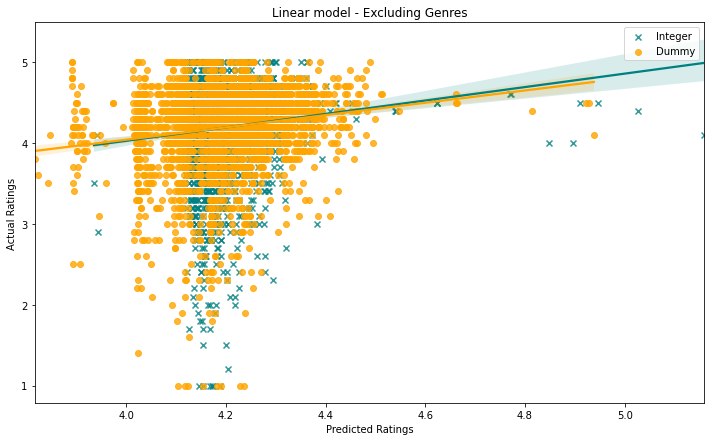

In [86]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [87]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - Dummy'),ignore_index = True)
resultsdf

,0,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Series Name
0,Linear - Integer,NaN,NaN,NaN,NaN
1,0.265187,NaN,NaN,NaN,NaN
2,0.360326,NaN,NaN,NaN,NaN
3,0.01312,NaN,NaN,NaN,NaN
4,NaN,0.362906,0.265824,0.013232,Linear - Dummy
